In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, ifft,fftshift
import control
import sympy as sp

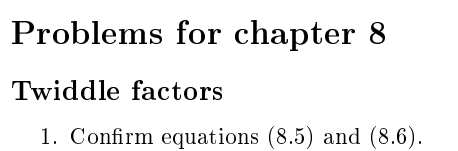

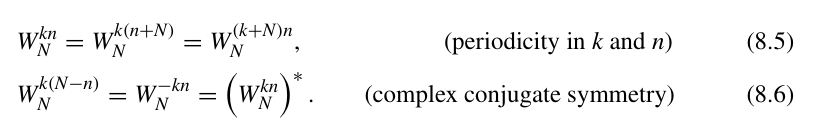

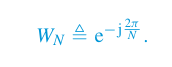

\begin{align*}
W_N ^{kn} &=(e^{-j2\pi /N})^{kn}\\
&=e^{(-j2\pi /N)kn}&=e^{-j2\pi kn /N}\\
W_N ^{k(n+N)}&=e^{-j2\pi /N k(n+N)}&=e^{-j2\pi kn/N-j2\pi k}=e^{-j2\pi kn/N}\\
W_N ^{(k+N)n}&=e^{-j2\pi /N(k+N)n}&=e^{-j2\pi n k /N-j2\pi n}=e^{-j2\pi kn/N}\\
\end{align*}

\begin{align*}
W_N ^{k(N-n)} &=(e^{-j2\pi /N})^{k(N-n)}=e^{-j2\pi /N k(N-n)}=e^{-j2\pi k +j2\pi k /N}&=e^{j2\pi k /N}\\
W_N ^{-kn} &= (e^{-j2\pi /N})^{-kn}&=e^{j2\pi kn /N}\\
(W_N ^{kn})^* &= (e^{-j2\pi kn /N})^*&=e^{j2\pi kn /N}\\
\end{align*}

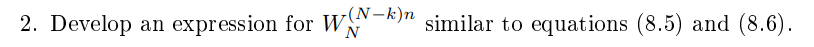

\begin{align*}
W_N ^{(N-k)n} &=(e^{-j2\pi /N})^{(N-k)n}=e^{-j2\pi /N (N-k)n}=e^{-j2\pi n +j2\pi kn/N}&=e^{j2\pi kn/N}\\\\
W_N ^{(N-n)k} &=(e^{-j2\pi /N})^{(N-n)k}=e^{-j2\pi /N (N-n)k}=e^{-j2\pi k +j2\pi kn /N}&=e^{j2\pi kn/N}\\
W_N ^{-nk} &=(e^{-j2\pi /N})^{-nk}=e^{-j2\pi /N (-nk)}&=e^{j2\pi kn /N}\\
W_N ^{-nk}&= (W_N ^{nk})^* =(e^{-j2\pi kn /N})^* &=e^{j2\pi kn /N}
\end{align*}

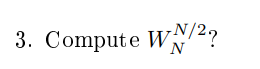

\begin{align*}
W_N ^{N/2} &=(e^{-j2\pi /N})^{N/2}\\
&=e^{-j2\pi /N(N/2)}\\
&=e^{-j\pi}\\
&=cos(-\pi)+jsin(-\pi)\\
&=cos(\pi)-jsin(\pi)\\
&=-1+j\cdot 0\\
&=-1\\
\end{align*}

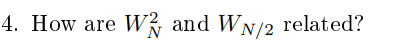

$$W_N ^2=e^{2\cdot (-j)2\pi /N}=e^{-j4\pi /N}$$
$$W_{N/2}=e^{ -j2\pi /(N/2)}=e^{2\cdot (-j)2\pi /N}=e^{-j4\pi /N}$$


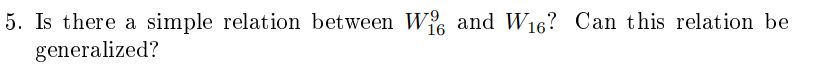

$$W_{16} =e^{-j2\pi /16}$$
$$W_{16} ^9 =e^{-9j2\pi /16}=e^{-j18\pi /16}$$


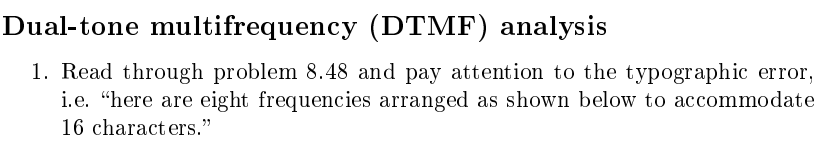

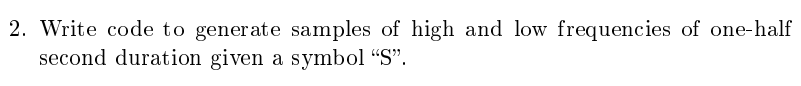

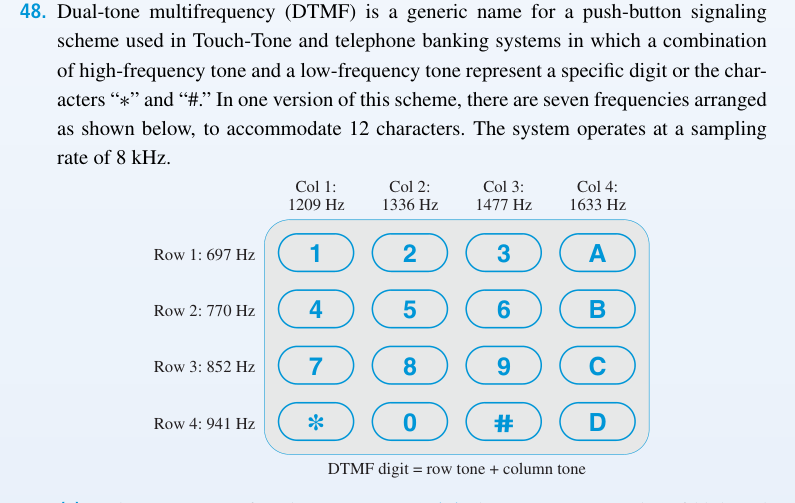

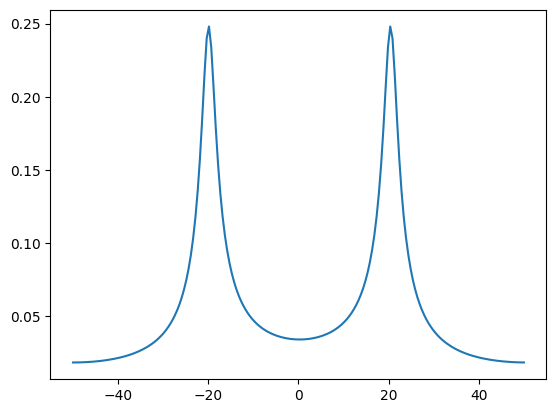

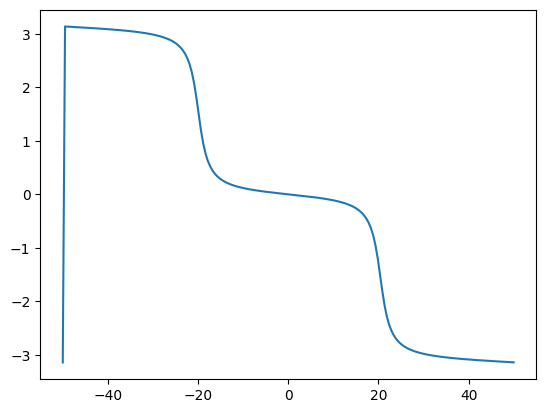

In [34]:
t0=0
t1=2
F0=10
Fs=10*F0
Ts=1/Fs
nT=np.linspace(t0,t1,(t1-t0)*Fs)
xn=5*np.exp(-10*nT)*np.sin(40*np.pi*nT)
Xfft=Ts*fftshift(fft(xn))
Freq=np.linspace(-50,50,(t1-t0)*Fs)
plt.plot(Freq,abs(Xfft))
plt.show()
plt.plot(Freq,np.angle(Xfft))
plt.show()

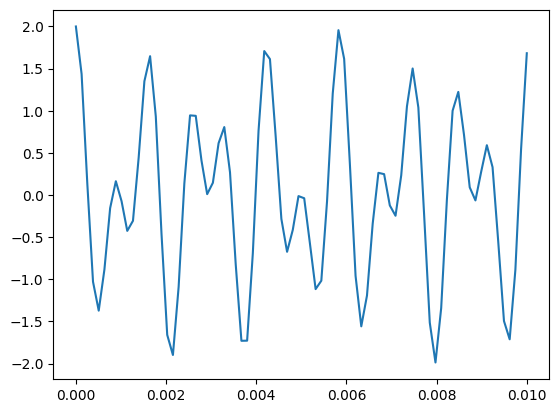

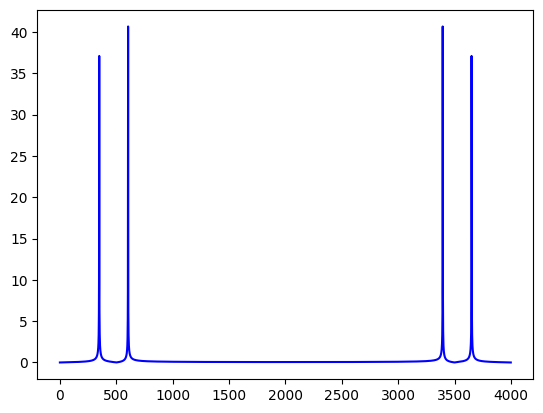

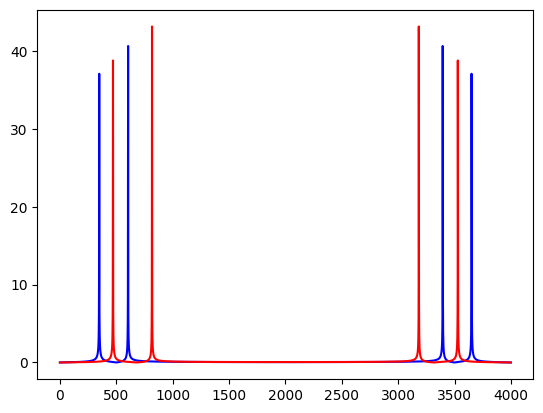

In [59]:
import sounddevice as sd
from time import sleep
def fast_slow(r,c,nT):
    row=np.array([697,770,852,941])
    col=np.array([1209,1336,1477,1633])
    return np.cos(2*np.pi*row[r]*nT)+np.cos(2*np.pi*col[c]*nT)
def DTMF(s,play=True):
    Fs=8000
    Ts=1/Fs
    t0=0
    t1=0.5
    nT=np.linspace(t0,t1,int((t1-t0)*Fs))
    dic={
        "1": fast_slow(0,0,nT),
        "2": fast_slow(0,1,nT),
        "3": fast_slow(0,2,nT),
        "A": fast_slow(0,3,nT),
        "4": fast_slow(1,0,nT),
        "5": fast_slow(1,1,nT),
        "6": fast_slow(1,1,nT),
        "B": fast_slow(1,2,nT),
        "7": fast_slow(2,0,nT),
        "8": fast_slow(2,1,nT),
        "9": fast_slow(2,2,nT),
        "C": fast_slow(2,3,nT),
        "*": fast_slow(3,0,nT),
        "0": fast_slow(3,1,nT),
        "#": fast_slow(3,2,nT),
        "D": fast_slow(3,3,nT)
    }
    ret=dic[str(s[-1])]
    if(not play):
        return ret
    for i in range(len(s)):
        sleep(0.5)
        sd.play(dic[str(s[i])],Fs)
        ret=dic[str(s[i])]
    return ret
t=np.linspace(0,0.01,80)
plt.plot(t,DTMF("1")[0:80])
plt.show()
plt.plot(abs(fft(DTMF("1"))*200/8000),'b')
plt.show()
plt.plot(abs(fft(DTMF("1"))/8000*200),'b')
plt.plot(abs(fft(DTMF("D"))/8000*200),'r')





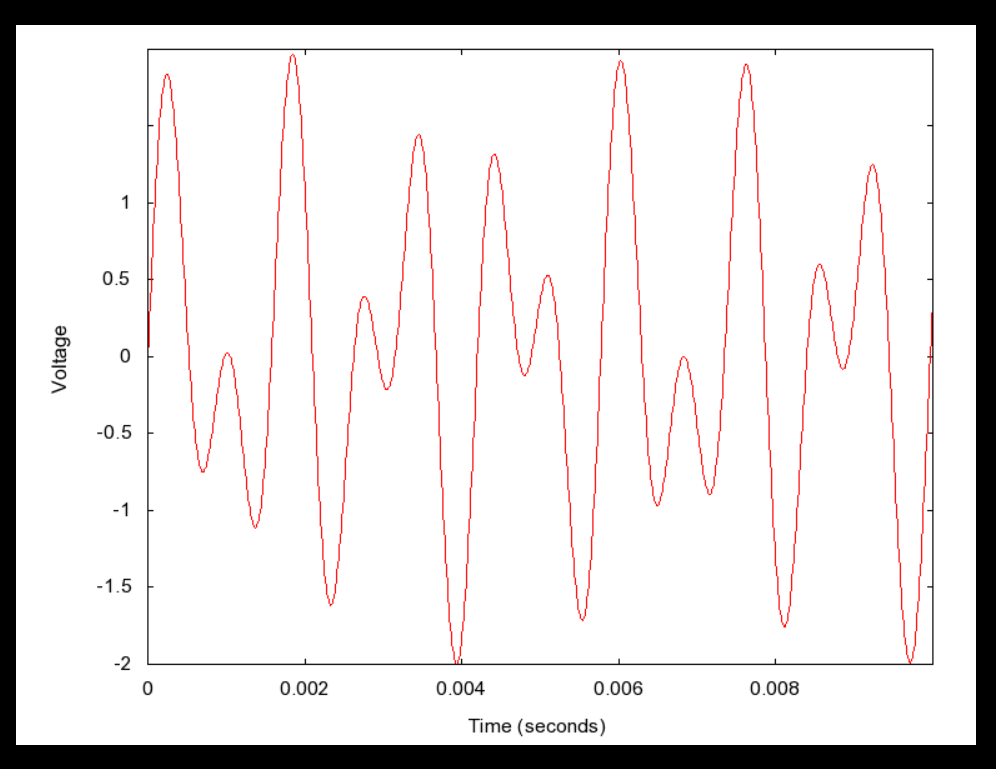

fra wikipedia

In [36]:
1/10000 * 100

0.01

In [37]:
Ts=1/8000
Ts*0.5


6.25e-05

In [64]:
def TT2sym(x):
    FH=np.array([1209,1336,1477,1633])
    FL=np.array([697,770,852,941])
    Fs=8000
    N=200
    k=np.round(np.append(FH,FL)/Fs*N)
    X=np.zeros(len(k))
    for i in range(k):
        V=signal.lfilter(1,[1,-2*np.cos*k[i],1],x)
        X=
    X=fft(x)/Fs*N
    V=abs(X) >30
    count=8
    p=False
    for i in range(len(V)):
        if count == 0:
            count=8
            p=False
        elif(V[i]):
            p=True
        if(p):
            print(V[i])
            count=count-1




In [65]:
xn=DTMF("D",play=False)
TT2sym(xn)


True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False


In [66]:
xn=DTMF("1",play=False)
TT2sym(xn)

True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False


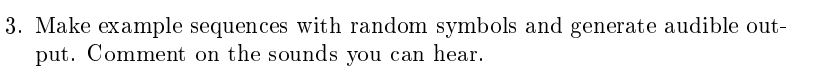

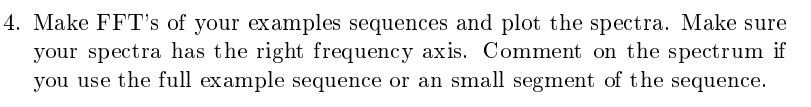

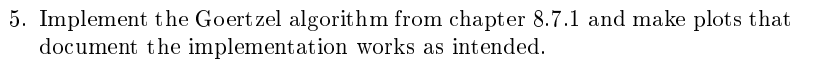

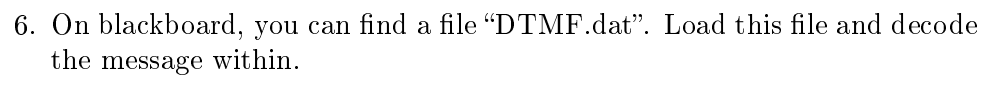